## Import packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)

#### Import Video Games sales with ratings into a pandas data frame and inspecting dataframe.

In [2]:
# Save VGData to 'File' variable 
file = open(r'C:\Users\eshai\Desktop\VGData.csv.csv')

# Open file and save file as pd Dataframe
vgdata = pd.read_csv(file)

#inspect Data
vgdata.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


The dataframe contains mutiple columns with missing values. First we will drop columns 

In [3]:
# Filter all Games that have been release before 2011 as 'post_2012'
post_2012 = vgdata['Year_of_Release'] > 2011

# Save filter data as 'fvg'
fvg = vgdata[post_2012]

# Drop all columns containing sales data:
fvg = fvg.drop(['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)


# View DataFrame
fvg

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,97.0,58.0,8.1,3711.0,Rockstar North,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,83.0,73.0,4.8,2256.0,Treyarch,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,97.0,66.0,8.3,2899.0,Rockstar North,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,73.0,29.0,2.6,2117.0,Infinity Ward,M
62,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,78.0,70.0,7.2,424.0,Nintendo,E


In [4]:
# Find all blank values in Dataframe and save them inside 'blank_values':
blank_values = fvg[fvg.isnull().any(axis=1)]

# View blank values 
blank_values

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
72,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,NaN,NaN,NaN,NaN,NaN,NaN
83,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,NaN,NaN,NaN,NaN,NaN,NaN
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
180,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop all video games that have a Nan values in 'Critic_Score' column:
VGR = fvg[np.isfinite(fvg['Critic_Score'])]


In [6]:
# Reset index:
VGR = VGR.reset_index(drop=True)

# View info of 'VGR' to verify no Nan values exsist in 'Critic_Score' column:
VGR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 11 columns):
Name               1312 non-null object
Platform           1312 non-null object
Year_of_Release    1312 non-null float64
Genre              1312 non-null object
Publisher          1312 non-null object
Critic_Score       1312 non-null float64
Critic_Count       1312 non-null float64
User_Score         1309 non-null object
User_Count         1297 non-null float64
Developer          1312 non-null object
Rating             1267 non-null object
dtypes: float64(4), object(7)
memory usage: 112.8+ KB


In [7]:
# Look for any Nan values within the DataFrame:
nanval = VGR[VGR.isnull().any(axis=1)]

#View Nan Values:
nanval


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
227,Football Manager 2013,PC,2012.0,Sports,Sega,86.0,37.0,6.7,228.0,Sports Interactive,NaN
488,Football Manager 2015,PC,2014.0,Simulation,Sega,80.0,36.0,6,151.0,Sports Interactive,NaN
514,Wolfenstein: The Old Blood,PS4,2015.0,Action,Bethesda Softworks,76.0,54.0,8,267.0,MachineGames,NaN
521,Metro: Last Light,PS3,2013.0,Action,Deep Silver,80.0,23.0,8.2,508.0,4A Games,NaN
548,Dark Souls III,XOne,2016.0,Role-Playing,Namco Bandai Games,87.0,14.0,8.6,514.0,From Software,NaN
588,Metro: Last Light,X360,2013.0,Action,Deep Silver,80.0,20.0,8.4,440.0,4A Games,NaN
765,Zombie Army Trilogy,PS4,2015.0,Shooter,Rebellion Developments,62.0,26.0,6.8,88.0,Rebellion,NaN
795,Singstar: Ultimate Party,PS4,2014.0,Misc,Sony Computer Entertainment Europe,47.0,19.0,4.1,18.0,SCEE,NaN
810,Skylanders Imaginators,WiiU,2016.0,Platform,Activision,76.0,4.0,tbd,NaN,Toys for Bob,E10+
822,MotoGP 15,PS4,2015.0,Racing,Milestone S.r.l.,66.0,15.0,NaN,NaN,Milestone S.r.l,NaN


In [8]:
# Fill Nan values in User_Score with mean of known values:
VGR['User_Score'] = pd.to_numeric(VGR['User_Score'], errors='coerce')
US_avg = VGR.User_Score.mean(skipna=True)
VGR['User_Score'] = VGR['User_Score'].fillna(US_avg)

# Multiply contents of User_Score by 10:
VGR['User_Score'] = VGR['User_Score'].mul(10)

In [9]:
# Fill Nan Values of User_Count with mean of known values:
VGR['User_Count'] = pd.to_numeric(VGR['User_Count'], errors='coerce')
UC_avg = VGR.User_Count.mean(skipna=True)
VGR['User_Count'] = VGR['User_Count'].fillna(UC_avg)


In [10]:
#Drop remaining Nan values in DataFrame:
VGR = VGR.dropna()

#View Dataframe:
VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,97.0,50.0,82.0,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,97.0,58.0,81.0,3711.0,Rockstar North,M
2,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,83.0,21.0,53.0,922.0,Treyarch,M
3,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,83.0,73.0,48.0,2256.0,Treyarch,M
4,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,97.0,66.0,83.0,2899.0,Rockstar North,M
5,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,73.0,29.0,26.0,2117.0,Infinity Ward,M
6,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,78.0,70.0,72.0,424.0,Nintendo,E
7,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,87.0,87.0,70.0,3260.0,343 Industries,M
8,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,71.0,10.0,26.0,1047.0,Infinity Ward,M
9,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,88.0,70.0,87.0,626.0,Nintendo,E


In [11]:
# Sort Values by 'Year_of_Release' :
VGR = VGR.sort_values(by='Year_of_Release')

# Reset Index and View :
VGR = VGR.reset_index(drop=True)
VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.000000,57.000000,The Workshop,E10+
1,Ninja Gaiden 3,X360,2012.0,Action,Tecmo Koei,58.0,39.0,44.000000,136.000000,Team Ninja,M
2,Hitman: Absolution,PC,2012.0,Action,Square Enix,79.0,26.0,70.000000,1327.000000,"Io Interactive, Nixxes Software",M
3,Ys: Memories of Celceta,PSV,2012.0,Action,Nihon Falcom Corporation,82.0,56.0,88.000000,237.000000,Falcom,T
4,Asura's Wrath,X360,2012.0,Action,Capcom,71.0,54.0,65.000000,131.000000,CyberConnect2,T
5,Tom Clancy's Ghost Recon: Future Soldier,PS3,2012.0,Shooter,Ubisoft,79.0,18.0,69.000000,156.000000,Ubisoft Paris,M
6,The Testament of Sherlock Holmes,PS3,2012.0,Adventure,Focus Home Interactive,65.0,16.0,74.000000,34.000000,Frogwares,M
7,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.000000,540.000000,SuperBot Entertainment,T
8,Mario Tennis Open,3DS,2012.0,Sports,Nintendo,69.0,58.0,69.000000,110.000000,Camelot Software Planning,E
9,Sniper Elite V2,PS3,2012.0,Shooter,505 Games,70.0,21.0,69.000000,92.000000,Rebellion,M


## Data Cleaning Finished 

In [12]:
#Save VGRE Dataframe to CSV File:
VGR.to_csv('VGR.csv')


In [13]:
# Count the number of games each developer released in the DataFrame:
Devs = np.unique(VGR['Developer'], return_counts=True)

# Covert contents of 'Devs' array into DataFrame:
Devs = pd.DataFrame({'Developer': list(Devs[0]),'Count': list(Devs[1])})

# View DataFrame:
Devs

,Count,Developer
0,3,2K Australia
1,2,2K Games
2,3,2K Marin
3,3,343 Industries
4,1,4A Games
5,1,505 Games
6,4,5TH Cell
7,6,5pb
8,1,Access Games
9,1,Acquire


In [14]:
# Create Bin Names
g_names = ['Small', 'Major']

# Create limits of Bins
bins = [0, 4, 50]

# Categorize Devs based on counts of games in DataFrame:
Devs['Developer_size'] = pd.cut(Devs['Count'], bins, labels=g_names)



In [15]:
# Merge VGR DataFrame 
VGR = VGR.merge(Devs, on='Developer')

# View Dataframe to verify merge:
VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Count,Developer_size
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.000000,57.000000,The Workshop,E10+,1,Small
1,Ninja Gaiden 3,X360,2012.0,Action,Tecmo Koei,58.0,39.0,44.000000,136.000000,Team Ninja,M,4,Small
2,Ninja Gaiden 3,PS3,2012.0,Action,Tecmo Koei,58.0,43.0,50.000000,152.000000,Team Ninja,M,4,Small
3,Dead or Alive 5,X360,2012.0,Fighting,Ubisoft Annecy,76.0,39.0,79.000000,95.000000,Team Ninja,M,4,Small
4,Dead or Alive 5,PS3,2012.0,Fighting,Tecmo Koei,74.0,34.0,77.000000,109.000000,Team Ninja,M,4,Small
5,Hitman: Absolution,PC,2012.0,Action,Square Enix,79.0,26.0,70.000000,1327.000000,"Io Interactive, Nixxes Software",M,1,Small
6,Ys: Memories of Celceta,PSV,2012.0,Action,Nihon Falcom Corporation,82.0,56.0,88.000000,237.000000,Falcom,T,5,Major
7,The Legend of Heroes: Trails of Cold Steel,PSV,2013.0,Role-Playing,Nippon Ichi Software,77.0,20.0,75.000000,132.000000,Falcom,T,5,Major
8,The Legend of Heroes: Trails of Cold Steel,PS3,2013.0,Role-Playing,Nippon Ichi Software,86.0,12.0,77.000000,128.000000,Falcom,T,5,Major
9,The Legend of Heroes: Trails of Cold Steel II,PS3,2014.0,Role-Playing,Nippon Ichi Software,90.0,4.0,78.000000,71.000000,Falcom,T,5,Major


In [16]:
# Count the number of games each developer released in the DataFrame:
Pubs = np.unique(VGR['Publisher'], return_counts=True)

# Covert contents of 'Devs' array into DataFrame:
Pubs = pd.DataFrame({'Publisher': list(Pubs[0]),'Counts': list(Pubs[1]) })


In [17]:
#Create Bin names
g_names = ['small', 'major']

#Create limit of bins
bins = [0, 12, 150]

#Categorize Pubs based on counts of games in DataFrame:
Pubs['Publisher_size'] = pd.cut(Pubs['Counts'], bins, labels=g_names)

Pubs


,Counts,Publisher,Publisher_size
0,23,505 Games,major
1,83,Activision,major
2,1,Activision Blizzard,small
3,2,Agatsuma Entertainment,small
4,6,Aksys Games,small
5,1,Alternative Software,small
6,1,Aqua Plus,small
7,3,Arc System Works,small
8,1,ArtDink,small
9,1,Atari,small


In [18]:
# Merge VGR DataFrame with Pubs on Publishers:
VGR = VGR.merge(Pubs, on='Publisher')

# Drop Counts from Dataframe:
VGR = VGR.drop(['Count','Counts'], axis=1)



In [19]:
# Create Bin Names for Analysis : 
g_names = ['Poor','Average', 'Good', 'Great']

#Bins Limits
bins = [0, 50, 75, 90, 100]

# Sort Critic_Score into Game Quality Categories:
VGR['Game_Quality'] = pd.cut(VGR['Critic_Score'], bins, labels=g_names)

# View DF with new Column:
VGR


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_size,Publisher_size,Game_Quality
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.000000,57.000000,The Workshop,E10+,Small,major,Average
1,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.000000,540.000000,SuperBot Entertainment,T,Small,major,Average
2,LittleBigPlanet Karting,PS3,2012.0,Action,Sony Computer Entertainment,73.0,69.0,69.000000,159.000000,"Media Molecule, United Front Games",E,Small,major,Average
3,Tokyo Jungle,PS3,2012.0,Action,Sony Computer Entertainment,74.0,60.0,84.000000,89.000000,Crispy's,T,Small,major,Average
4,MLB 12: The Show,PS3,2012.0,Sports,Sony Computer Entertainment,87.0,23.0,75.000000,75.000000,SCEA San Diego Studios,E,Major,major,Good
5,MLB 12: The Show,PSV,2012.0,Sports,Sony Computer Entertainment,76.0,15.0,78.000000,42.000000,SCEA San Diego Studios,E,Major,major,Good
6,MLB 13: The Show,PSV,2013.0,Sports,Sony Computer Entertainment,75.0,7.0,75.000000,21.000000,SCEA San Diego Studios,E,Major,major,Average
7,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,87.0,36.0,78.000000,114.000000,SCEA San Diego Studios,E,Major,major,Good
8,MLB 15: The Show,PS4,2015.0,Sports,Sony Computer Entertainment,80.0,44.0,78.000000,190.000000,SCEA San Diego Studios,E,Major,major,Good
9,LittleBigPlanet PS Vita,PSV,2012.0,Platform,Sony Computer Entertainment,88.0,71.0,86.000000,348.000000,"Tarsier Studios, Double Eleven",E,Small,major,Good


In [20]:
#adding platform release year to Dataframe:
Console_Date = {'Platform':['3DS', 'DS', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne', 'PC'], 'Platform_Date':[2011, 2004, 2006, 2014, 2004, 2011, 2006, 2012, 2005, 2013, 2012] }

# merging console date with dataframe
Console_Date = pd.DataFrame(data=Console_Date)

VGR = VGR.merge(Console_Date, on='Platform')

VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_size,Publisher_size,Game_Quality,Platform_Date
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.0,57.0,The Workshop,E10+,Small,major,Average,2006
1,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.0,540.0,SuperBot Entertainment,T,Small,major,Average,2006
2,LittleBigPlanet Karting,PS3,2012.0,Action,Sony Computer Entertainment,73.0,69.0,69.0,159.0,"Media Molecule, United Front Games",E,Small,major,Average,2006
3,Tokyo Jungle,PS3,2012.0,Action,Sony Computer Entertainment,74.0,60.0,84.0,89.0,Crispy's,T,Small,major,Average,2006
4,MLB 12: The Show,PS3,2012.0,Sports,Sony Computer Entertainment,87.0,23.0,75.0,75.0,SCEA San Diego Studios,E,Major,major,Good,2006
5,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,87.0,36.0,78.0,114.0,SCEA San Diego Studios,E,Major,major,Good,2006
6,Starhawk,PS3,2012.0,Action,Sony Computer Entertainment,77.0,71.0,78.0,188.0,LightBox Interactive,T,Small,major,Good,2006
7,Invizimals: The Lost Kingdom,PS3,2013.0,Action,Sony Computer Entertainment,50.0,16.0,50.0,14.0,Magenta Software,E10+,Small,major,Poor,2006
8,God of War: Ascension,PS3,2013.0,Action,Sony Computer Entertainment,80.0,89.0,75.0,914.0,SCE Santa Monica,M,Small,major,Good,2006
9,Beyond: Two Souls,PS3,2013.0,Adventure,Sony Computer Entertainment,70.0,98.0,81.0,2652.0,Quantic Dream,M,Small,major,Average,2006


In [21]:
#add YSR to dataframe
VGR['YSR'] = VGR['Year_of_Release'] - VGR['Platform_Date']

VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_size,Publisher_size,Game_Quality,Platform_Date,YSR
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.0,57.0,The Workshop,E10+,Small,major,Average,2006,6.0
1,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.0,540.0,SuperBot Entertainment,T,Small,major,Average,2006,6.0
2,LittleBigPlanet Karting,PS3,2012.0,Action,Sony Computer Entertainment,73.0,69.0,69.0,159.0,"Media Molecule, United Front Games",E,Small,major,Average,2006,6.0
3,Tokyo Jungle,PS3,2012.0,Action,Sony Computer Entertainment,74.0,60.0,84.0,89.0,Crispy's,T,Small,major,Average,2006,6.0
4,MLB 12: The Show,PS3,2012.0,Sports,Sony Computer Entertainment,87.0,23.0,75.0,75.0,SCEA San Diego Studios,E,Major,major,Good,2006,6.0
5,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,87.0,36.0,78.0,114.0,SCEA San Diego Studios,E,Major,major,Good,2006,7.0
6,Starhawk,PS3,2012.0,Action,Sony Computer Entertainment,77.0,71.0,78.0,188.0,LightBox Interactive,T,Small,major,Good,2006,6.0
7,Invizimals: The Lost Kingdom,PS3,2013.0,Action,Sony Computer Entertainment,50.0,16.0,50.0,14.0,Magenta Software,E10+,Small,major,Poor,2006,7.0
8,God of War: Ascension,PS3,2013.0,Action,Sony Computer Entertainment,80.0,89.0,75.0,914.0,SCE Santa Monica,M,Small,major,Good,2006,7.0
9,Beyond: Two Souls,PS3,2013.0,Adventure,Sony Computer Entertainment,70.0,98.0,81.0,2652.0,Quantic Dream,M,Small,major,Average,2006,7.0


In [22]:
#save file
VGR.to_csv('VGR.csv')

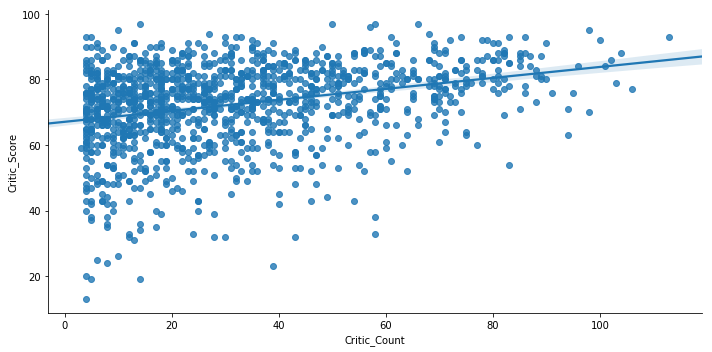

In [23]:
# Create and Show Scatter plot of User Score and Critic Score:
fig = sns.lmplot(x='Critic_Count', y='Critic_Score', data=VGR, aspect= 2)
plt.show()

fig.savefig("Score_Count.png")

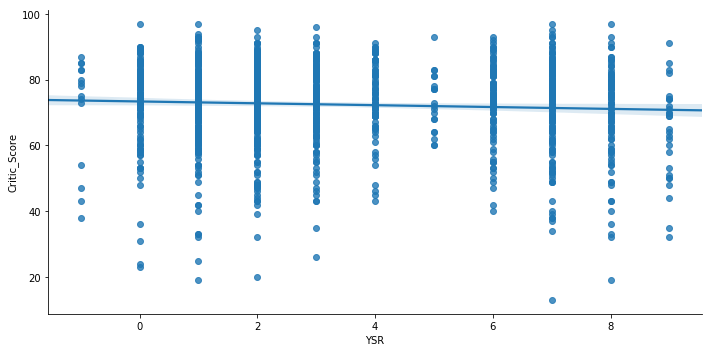

In [24]:
# Create and Show scatter plot of critic score and critic count:
fig = sns.lmplot(x='YSR', y='Critic_Score', data=VGR, aspect= 2)
plt.show()

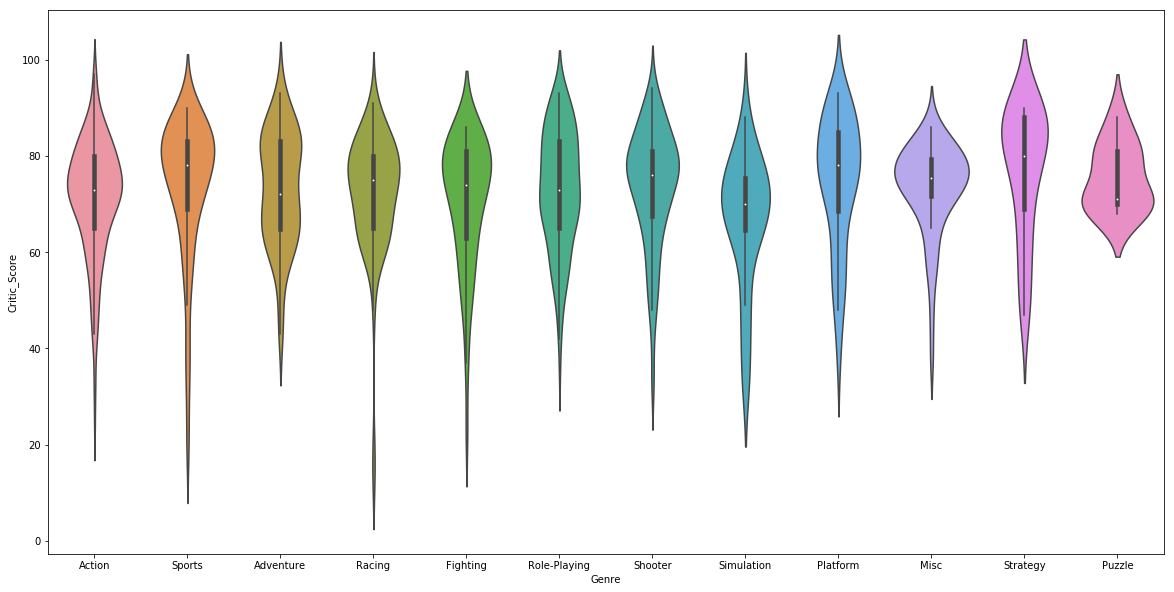

In [25]:
# Create and Show violin plot of genre and Critic Score 
fig2 = sns.violinplot(x='Genre', y='Critic_Score', data=VGR)

fig2 = fig2.get_figure()

fig2.savefig("Score_Genre.png")

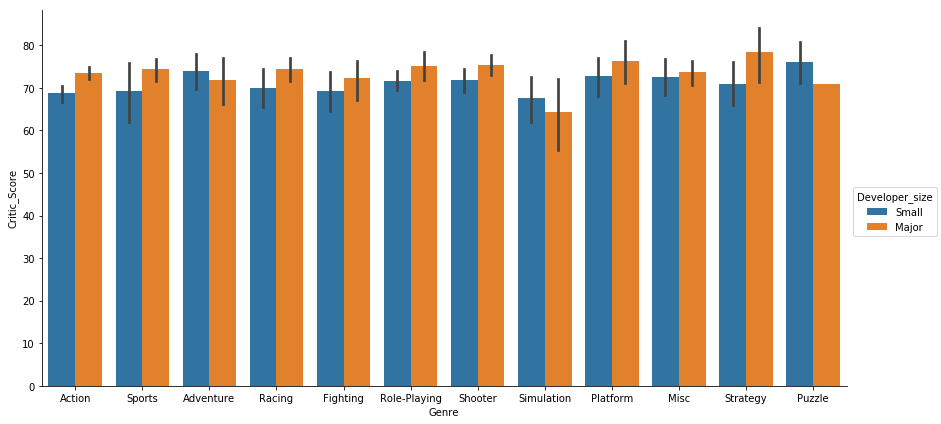

In [26]:
#Create and show bar plot of Genre and Critic Score:
fig3 = sns.factorplot(x="Genre", y="Critic_Score", hue="Developer_size", data=VGR, size=6, kind="bar", aspect=2)

fig3.savefig("Score_Genre_bar.png")

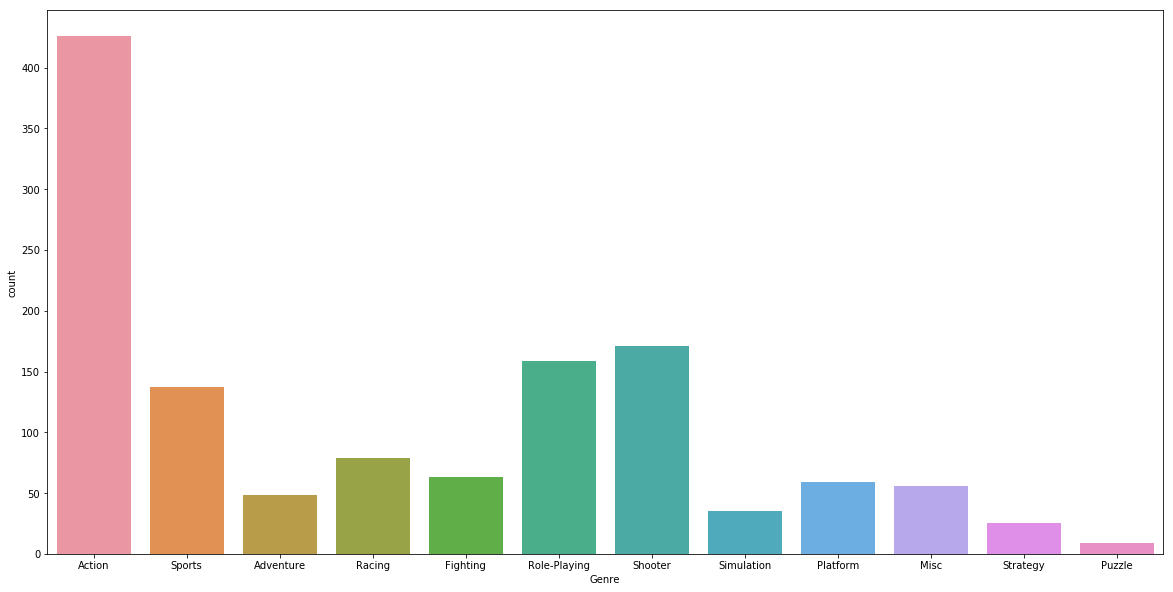

In [27]:
#Create and show count plot:
fig4 = sns.countplot(x="Genre", data=VGR )

fig4 = fig4.get_figure()

fig4.savefig("Count_Genre_bar.png")

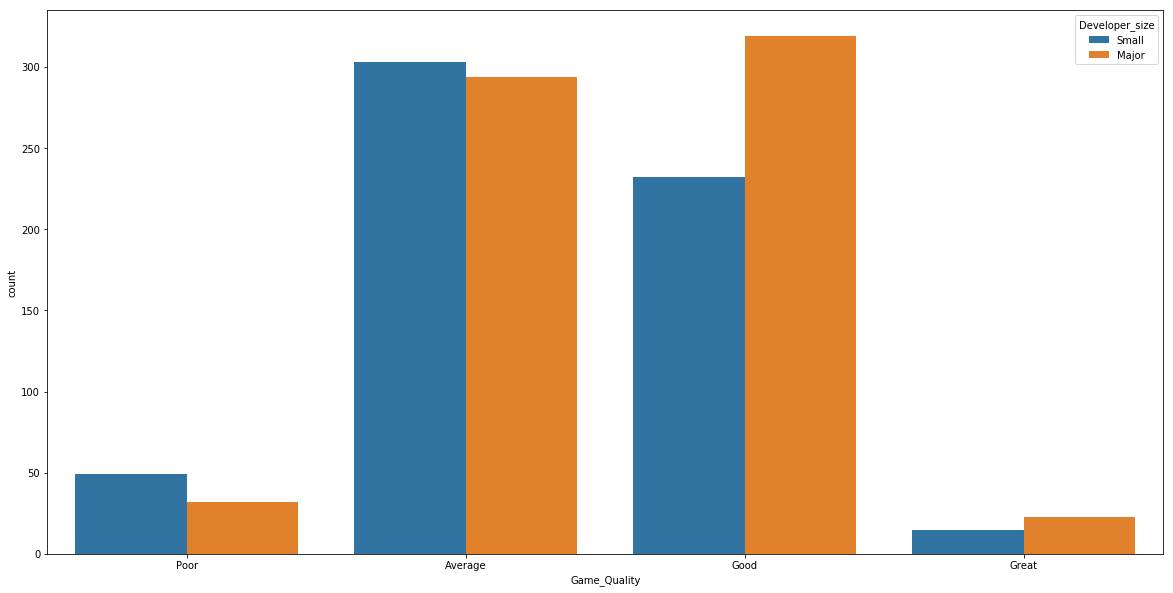

In [28]:
# Create and Show count plot:
sns.countplot(x="Game_Quality", data=VGR, hue='Developer_size' )
plt.show()

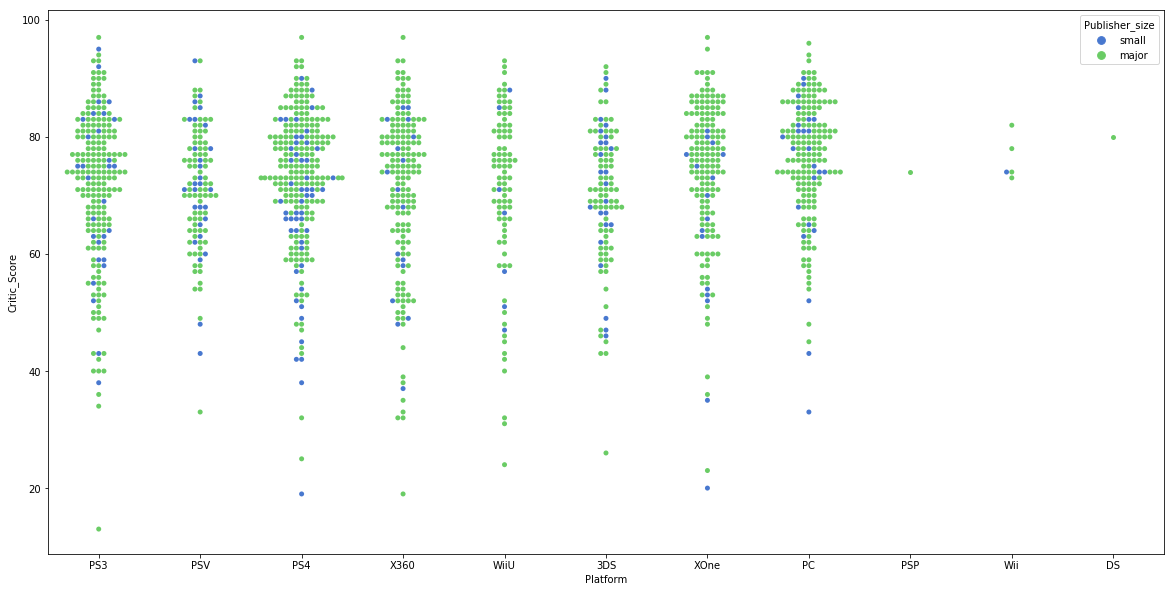

In [29]:
#Create and show box plot:
sns.swarmplot(x='Platform', y='Critic_Score', data=VGR, hue='Publisher_size', palette="muted")
plt.show()

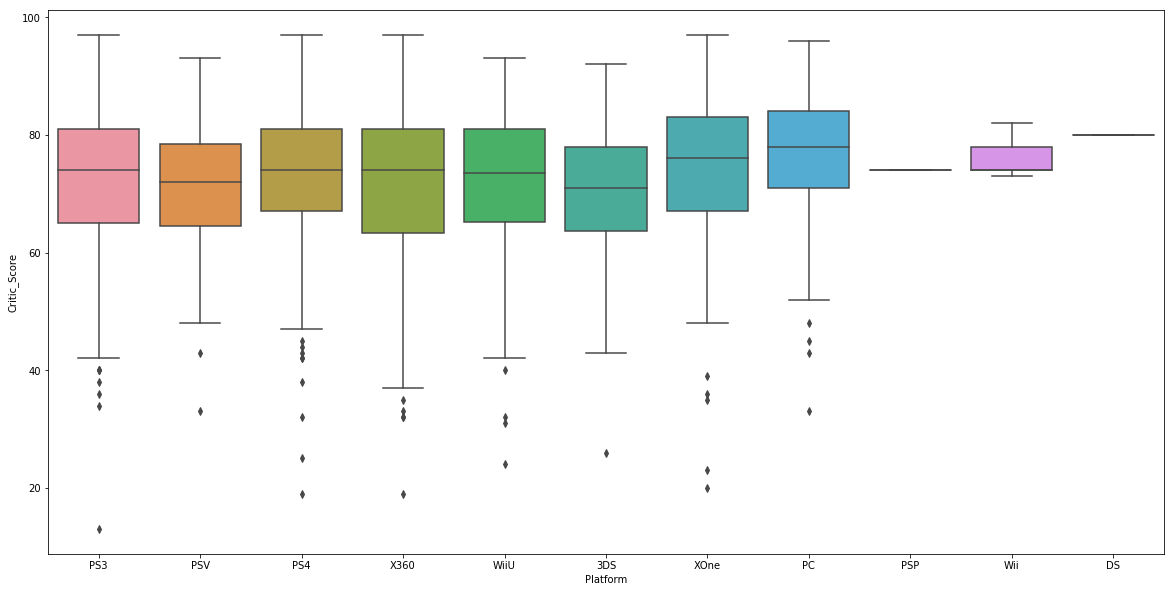

In [30]:
#create and show boxplot:
sns.boxplot(x='Platform', y='Critic_Score', data=VGR)
plt.show()

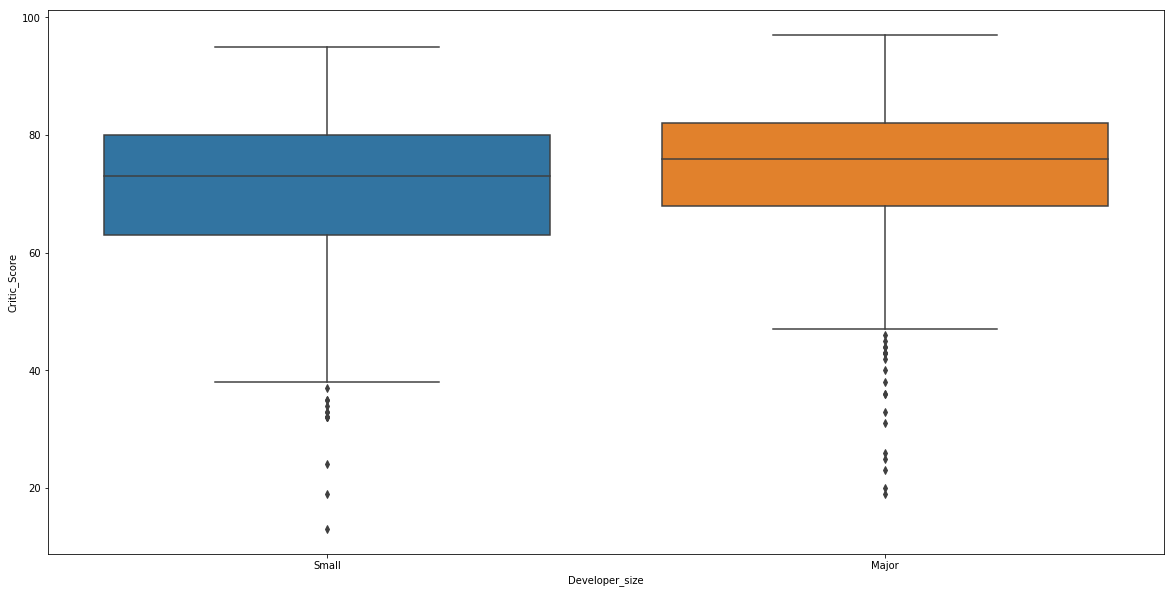

In [31]:
#create and show boxplot:
sns.boxplot(x='Developer_size', y='Critic_Score', data=VGR)
plt.show()

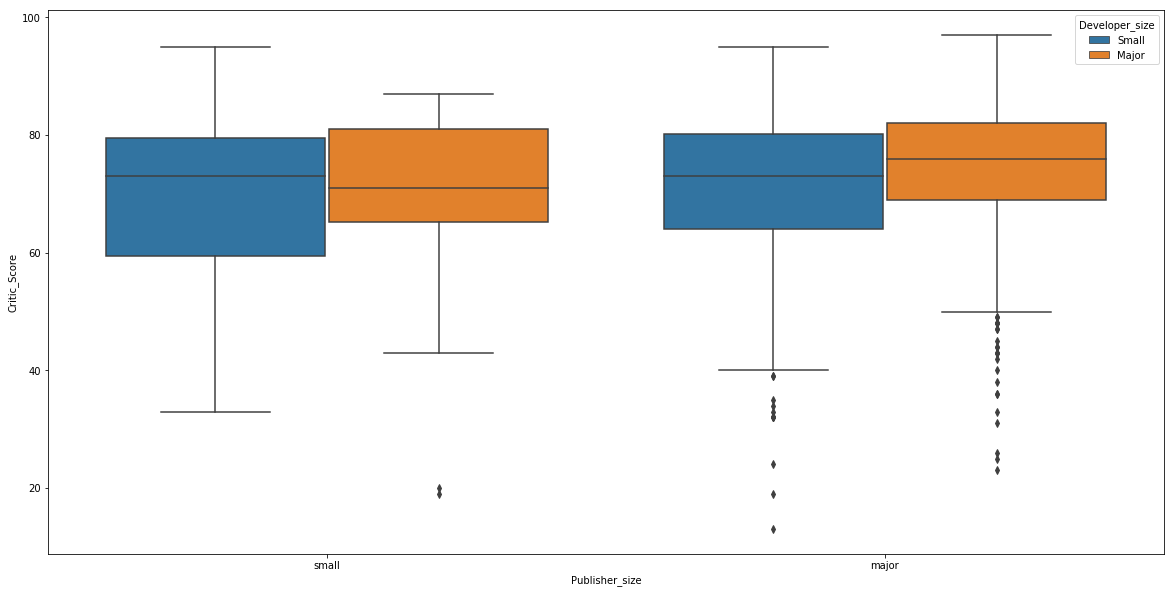

In [32]:
#create and show box plot:
sns.boxplot(x='Publisher_size', y='Critic_Score', data=VGR, hue='Developer_size')
plt.show()

Text(0,0.5,'Avg Critic Score')

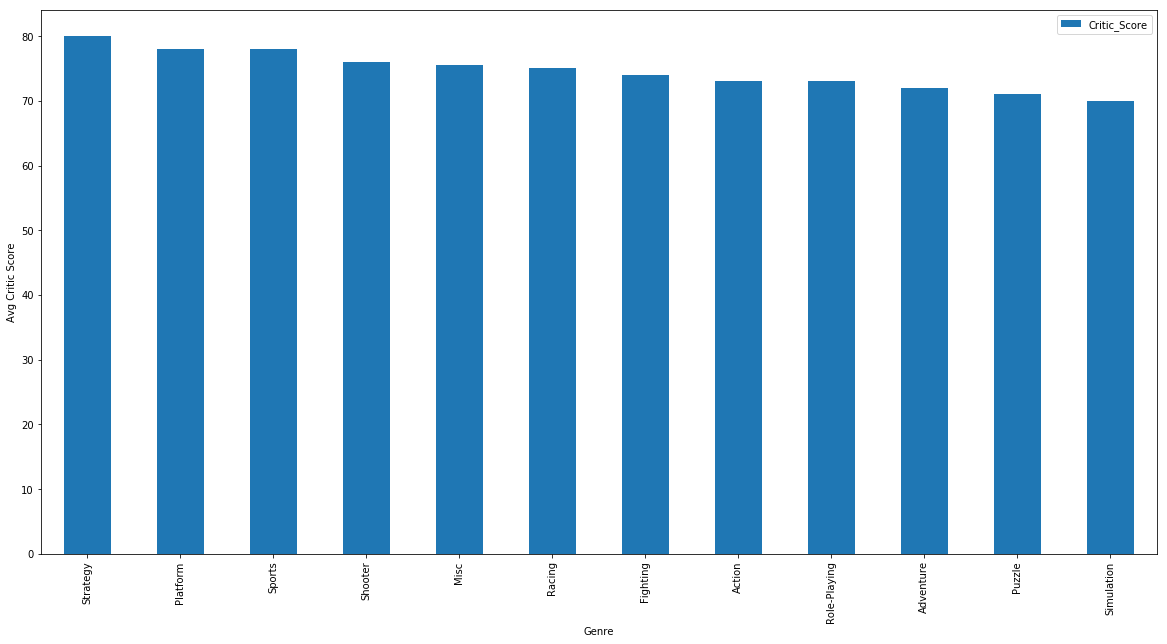

In [33]:
genre_avg = pd.DataFrame(VGR.groupby("Genre").Critic_Score.median())

genre_avg.sort_values("Critic_Score", ascending = False).plot(kind="bar")
plt.ylabel('Avg Critic Score')

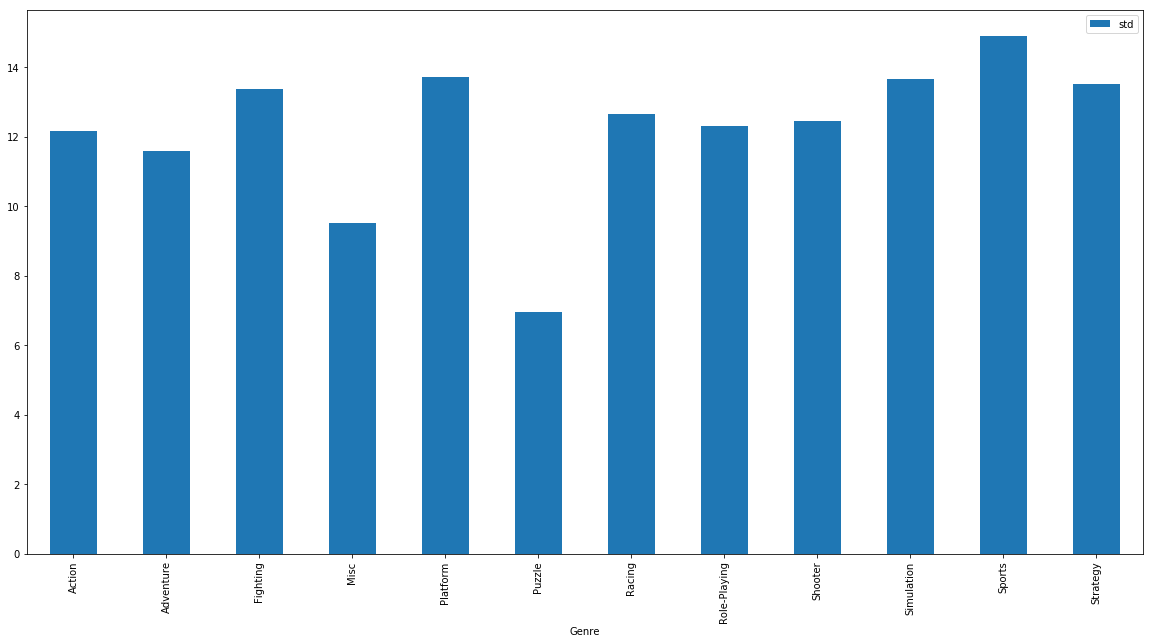

In [34]:
#Plot STD
top_genre = VGR.Genre.value_counts()

genre_std = VGR[VGR["Genre"].isin(top_genre.index)].groupby("Genre").describe()["Critic_Score"]

fig5 = genre_std.plot(y="std",kind="bar")

fig5 = fig5.get_figure()

fig5.savefig("STD_Genre_bar.png")

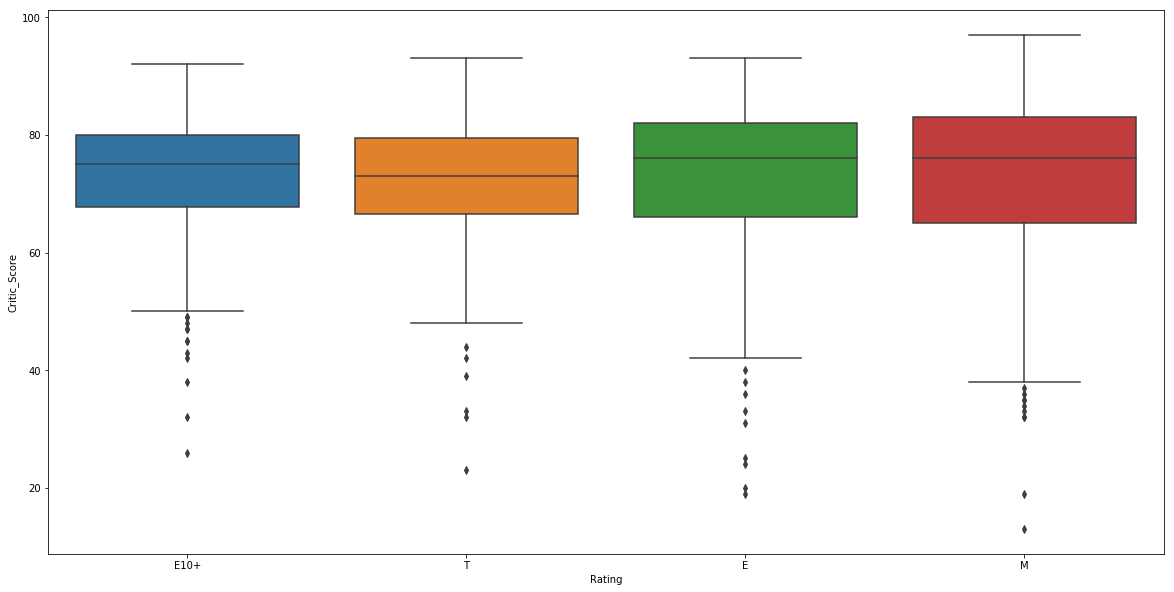

In [35]:
# plot of Genre and Critic Score 

fig5 = sns.boxplot(x='Rating', y='Critic_Score', data=VGR)

fig5 = fig5.get_figure()

fig5.savefig("Ratings_Score.png")

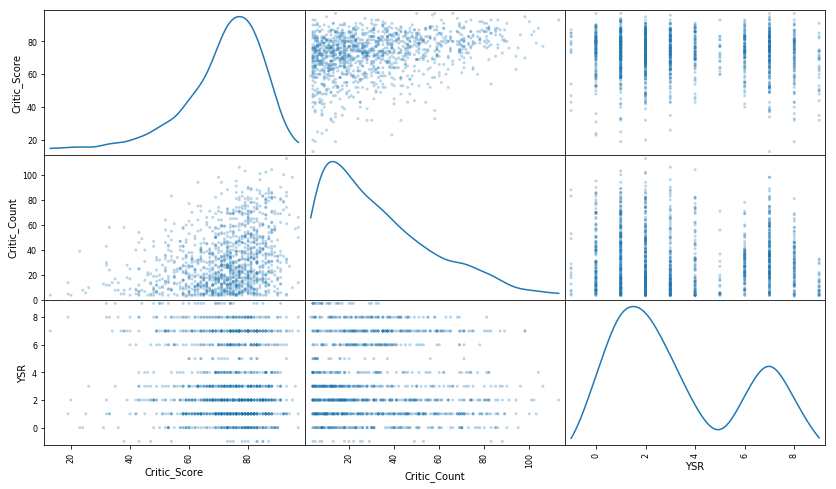

In [36]:
pd.plotting.scatter_matrix(VGR[['Critic_Score','Critic_Count', 'YSR']], alpha = 0.3, figsize = (14,8), diagonal = 'kde')

plt.show()

# Model Construction Attempt 1

In [37]:
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold

C:\Users\eshai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
df = VGR.copy()

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'Developer_size', 'Publisher_size', 'Game_Quality',
       'Platform_Date', 'YSR'],
      dtype='object')

In [39]:
df = df.drop(['Name', 'Year_of_Release', 'Publisher', 'Critic_Count', 'User_Score', 'User_Count','Game_Quality', 'Platform_Date'], axis=1)

In [78]:
#Create Dummy variables 


dfwd = pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating', 'Developer_size', 'Publisher_size', 'Developer']).reset_index(drop=True)

X = dfwd.drop(['Critic_Score'], axis=1)

y = dfwd.Critic_Score


In [75]:
 def VarianceThreshold_selector(data):
    columns = data.columns
    selector = VarianceThreshold()
    selector.fit_transform(data)
    labels = [columns[a] for a in selector.get_support(indices=True) if a]
    return pd.DataFrame(selector.fit_transform(data), columns=labels)

In [77]:
VarianceThreshold_selector(dfwd)

ValueError: Shape of passed values is (416, 1267), indices imply (415, 1267)